# Group 7 Final Project - Cheapest Electric Vehicle

By: Alonzo Machiraju, Fernando Arozqueta, Illia Sapryga, Joshan Dhillon, Ngoc Tran-Dao


In this project we will explore the most affordable electric vehicle based on the data collected from the kaggle. We will   

#### Our goals
- To determine the most expensive EV in the market.
- Determine fast charging EVs.
- Vehicles using all wheel drive.
- Fastest EV based on Top Speed


### About the dataset
**Name**: Cheapest Electric Cars

**Provenance**: EV Database / Web Scraping

**Last updated**: August 16th 2021

**Date created**: August 16th 2021

**Dataset Owner**: Quantum.Minds Link: https://www.kaggle.com/kkhandekar

Data acquired February 19, 2022, hosted on [GitHub](https://github.com/nanoarzqta/CST383---Final-Project/blob/main/Cheapestelectriccars-EVDatabase.csv) by [nanoarzqta](https://github.com/nanoarzqta/CST383---Final-Project).


In [1]:
# code in this cell from: 
# https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
from IPython.display import HTML
import sys
%matplotlib inline
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context
import warnings
warnings.filterwarnings('ignore')

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to display/hide the code."></form>''')

In [2]:
# Added to remove in and out in the margin

#%%HTML
#<style>
#div.prompt {display:none}
#</style>

### Sneakpeak of the dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
sns.set()
rcParams['figure.figsize'] = 8,6
sns.set_context('talk')

In [4]:
url = "https://raw.githubusercontent.com/nanoarzqta/CST383---Final-Project/main/Cheapestelectriccars-EVDatabase.csv"
df = pd.read_csv(url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    180 non-null    object 
 1   Battery (kWh)           180 non-null    float64
 2   Acceleration (sec)      180 non-null    float64
 3   TopSpeed (km/h)         180 non-null    int64  
 4   Range (km)              180 non-null    int64  
 5   Efficiency (Wh/km)      180 non-null    int64  
 6   FastChargeSpeed (km/h)  180 non-null    int64  
 7   Drive                   180 non-null    object 
 8   NumberofSeats           180 non-null    int64  
 9   PriceinGermany (Euro)   180 non-null    object 
 10  PriceinUK (Pounds)      180 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ KB


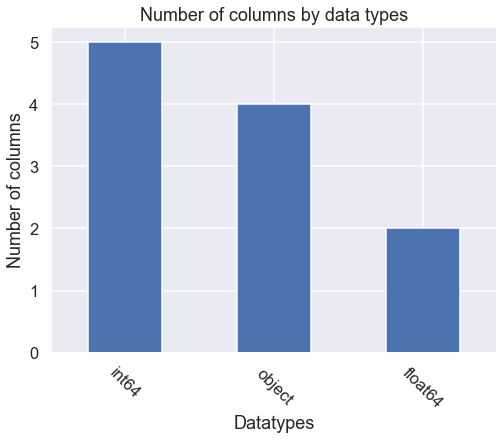

In [5]:
barplot = df.dtypes.value_counts().plot.bar();
plt.title("Number of columns by data types")
plt.xlabel("Datatypes")
plt.ylabel("Number of columns")
plt.xticks(rotation=-45)
plt.show(barplot)

In [6]:
df.describe().round()

,Battery (kWh),Acceleration (sec),TopSpeed (km/h),Range (km),Efficiency (Wh/km),FastChargeSpeed (km/h),NumberofSeats
count,180.0,180.0,180.0,180.0,180.0,180.0,180.0
mean,65.0,8.0,176.0,337.0,194.0,468.0,5.0
std,25.0,3.0,42.0,119.0,33.0,252.0,1.0
min,17.0,2.0,123.0,95.0,104.0,0.0,2.0
25%,45.0,6.0,150.0,259.0,168.0,280.0,5.0
50%,66.0,8.0,160.0,340.0,188.0,420.0,5.0
75%,77.0,10.0,200.0,400.0,215.0,590.0,5.0
max,200.0,22.0,410.0,970.0,281.0,1410.0,7.0


Further investigation of the numeric columns shows weird data. We have minimum and maximum values for *Vehicle Year* that does not make sense. Below is a distribution of all the reported vehicles with 

In [7]:
df.columns

Index(['Name', 'Battery (kWh)', 'Acceleration (sec)', 'TopSpeed (km/h)',
       'Range (km)', 'Efficiency (Wh/km)', 'FastChargeSpeed (km/h)', 'Drive',
       'NumberofSeats', 'PriceinGermany (Euro)', 'PriceinUK (Pounds)'],
      dtype='object')

# Data exploration

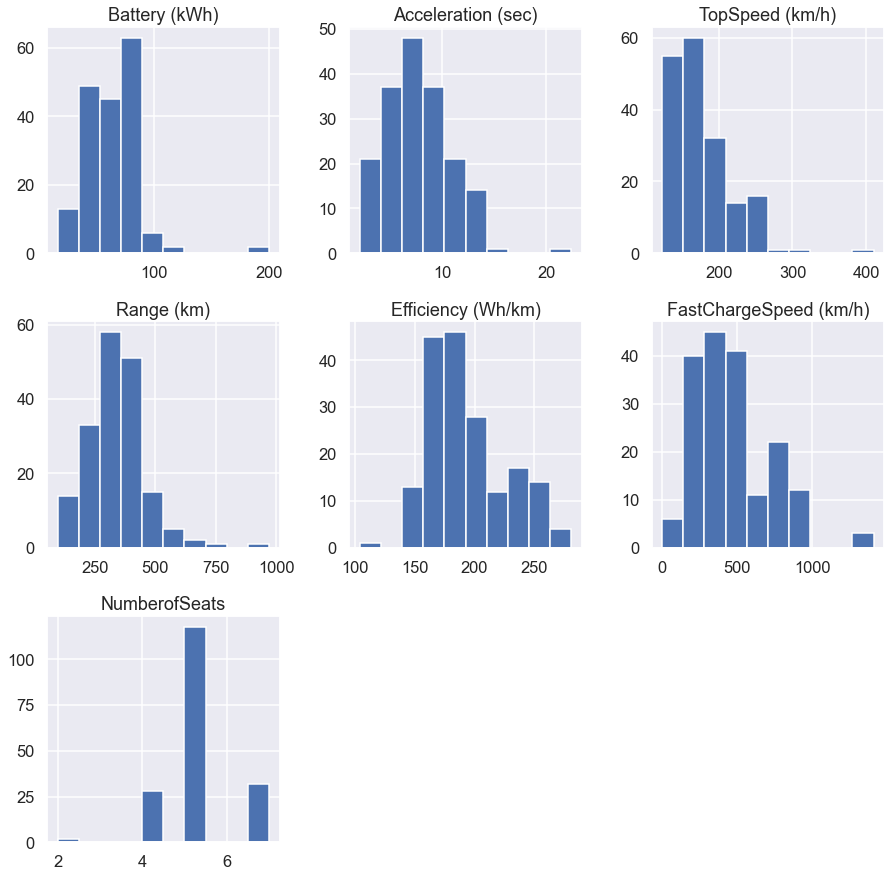

In [8]:
df.iloc[:,:].hist(figsize=(15,15))
plt.show()

#### 

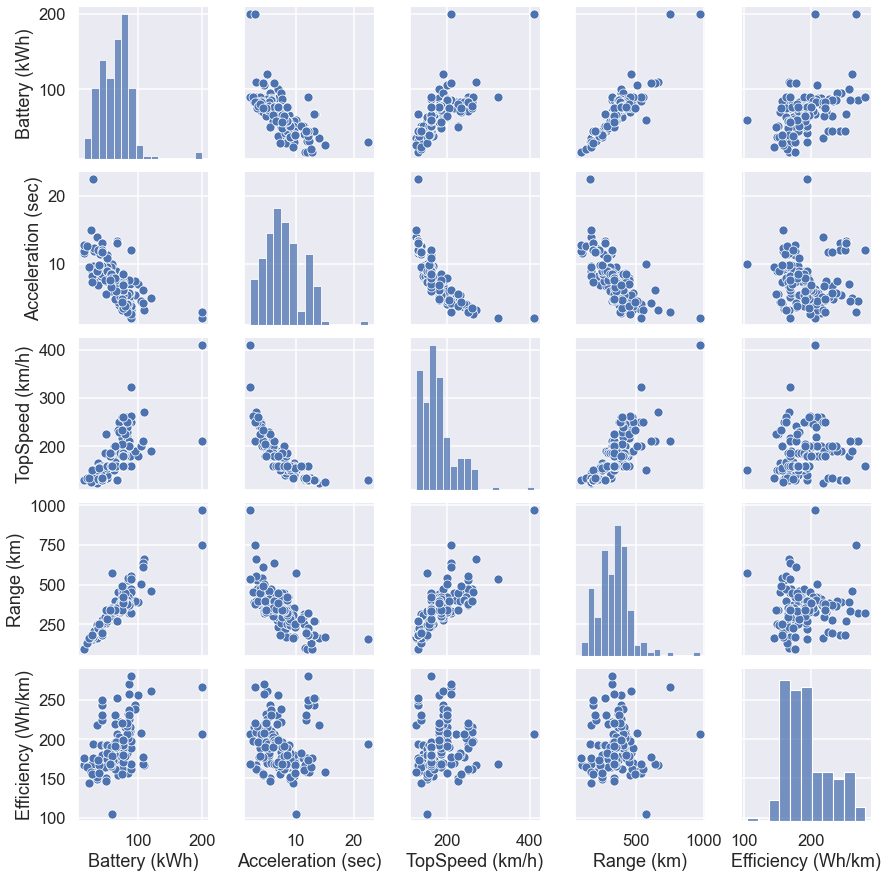

In [9]:
sns.pairplot(df, vars=["Battery (kWh)","Acceleration (sec)", "TopSpeed (km/h)", "Range (km)", "Efficiency (Wh/km)"]);

In [10]:
data2a=df[['Name','Efficiency (Wh/km)']]
data2a['Efficiency(Wh/km)']=df['Efficiency (Wh/km)']
data2a=data2a.groupby('Name',as_index=False).max()
data2a=data2a.sort_values('Efficiency(Wh/km)',ascending=False)
data2a

,Name,Efficiency (Wh/km),Efficiency(Wh/km)
87,Mercedes EQV 300 Long,281,281
86,Mercedes EQV 300 Extra-Long,281,281
12,Audi e-tron S 55 quattro,270,270
146,Tesla Cybertruck Tri Motor,267,267
144,Tesla Cybertruck Dual Motor,261,261
...,...,...,...
150,Tesla Model 3 Standard Range Plus LFP,150,150
41,Fiat 500e Hatchback 42 kWh,149,149
149,Tesla Model 3 Standard Range Plus,147,147
40,Fiat 500e Hatchback 24 kWh,144,144


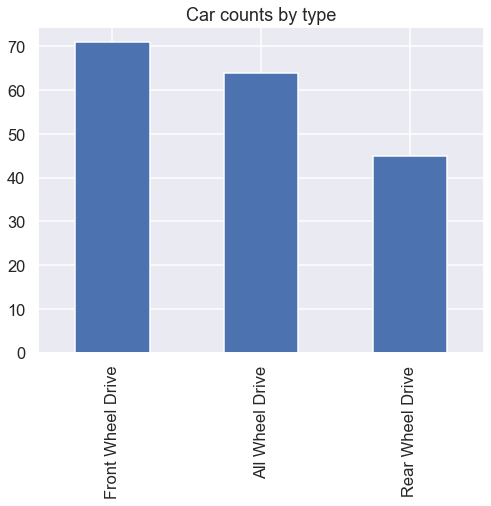

In [11]:
df["Drive"].value_counts().plot.bar()
plt.title('Car counts by type');

In [12]:
X = df[['Efficiency (Wh/km)']].values
y = df['Range (km)'].values

reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
reg.fit(X,y)

LinearRegression()

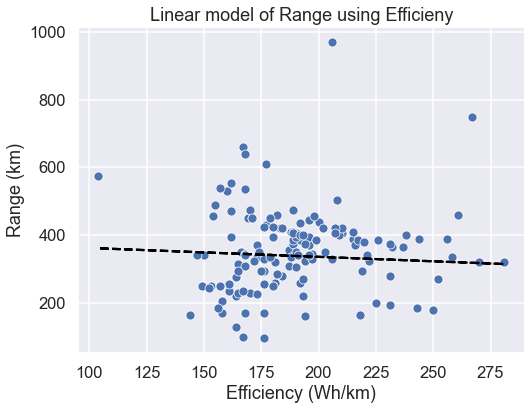

In [13]:
predicted = reg.predict(X)
sns.scatterplot(x=df['Efficiency (Wh/km)'], y=df['Range (km)'])
plt.plot(X,predicted,linestyle='dashed',color='black')
plt.title('Linear model of Range using Efficieny');

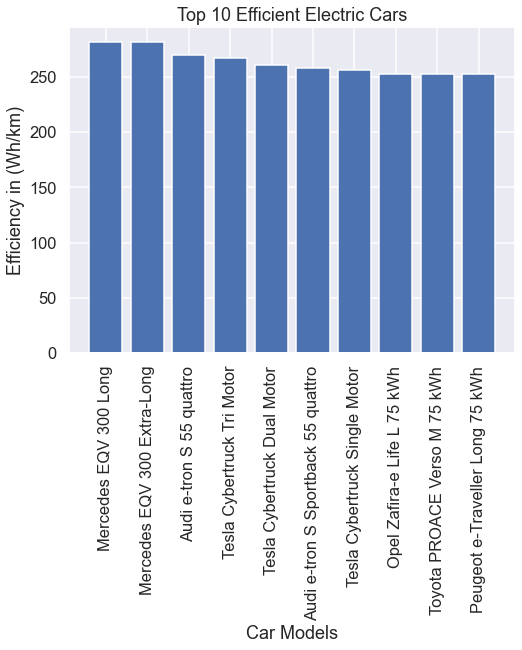

In [14]:
Name = data2a['Name'].head(10)
Efficiency = data2a['Efficiency (Wh/km)'].head(10)
fig = plt.figure()
plt.bar(Name, Efficiency)
 
plt.xlabel("Car Models")
plt.xticks(rotation = 90)
plt.ylabel("Efficiency in (Wh/km)")
plt.title("Top 10 Efficient Electric Cars")
plt.show()

In [15]:
data2b=df[['Name','Battery (kWh)']]
data2b['Battery (kWh)']=df['Battery (kWh)']
data2b=data2b.groupby('Name',as_index=False).max()
data2b=data2b.sort_values('Battery (kWh)',ascending=False)
data2b

,Name,Battery (kWh)
157,Tesla Roadster,200.0
146,Tesla Cybertruck Tri Motor,200.0
144,Tesla Cybertruck Dual Motor,120.0
69,Lucid Air Grand Touring,110.0
84,Mercedes EQS 450+,107.8
...,...,...
40,Fiat 500e Hatchback 24 kWh,23.8
129,Renault Twingo Electric,21.3
142,Smart EQ fortwo coupe,16.7
141,Smart EQ fortwo cabrio,16.7


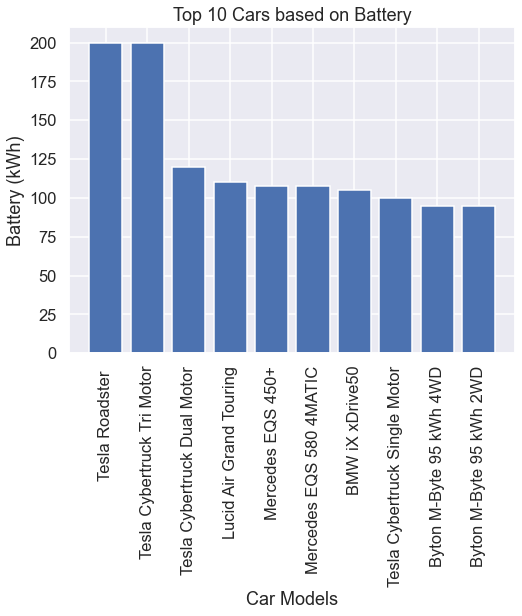

In [16]:
Name = data2b['Name'].head(10)
Battery = data2b['Battery (kWh)'].head(10)
fig = plt.figure()
plt.bar(Name, Battery)
 
plt.xlabel("Car Models")
plt.xticks(rotation = 90)
plt.ylabel("Battery (kWh)")
plt.title("Top 10 Cars based on Battery")
plt.show()

In [17]:
data2c=df[['Name','Range (km)']]
data2c['Range (km)']=df['Range (km)']
data2c=data2c.groupby('Name',as_index=False).max()
data2c=data2c.sort_values('Range (km)',ascending=False)
data2c

,Name,Range (km)
157,Tesla Roadster,970
146,Tesla Cybertruck Tri Motor,750
69,Lucid Air Grand Touring,660
84,Mercedes EQS 450+,640
85,Mercedes EQS 580 4MATIC,610
...,...,...
127,Renault Kangoo Maxi ZE 33,160
129,Renault Twingo Electric,130
142,Smart EQ fortwo coupe,100
141,Smart EQ fortwo cabrio,95


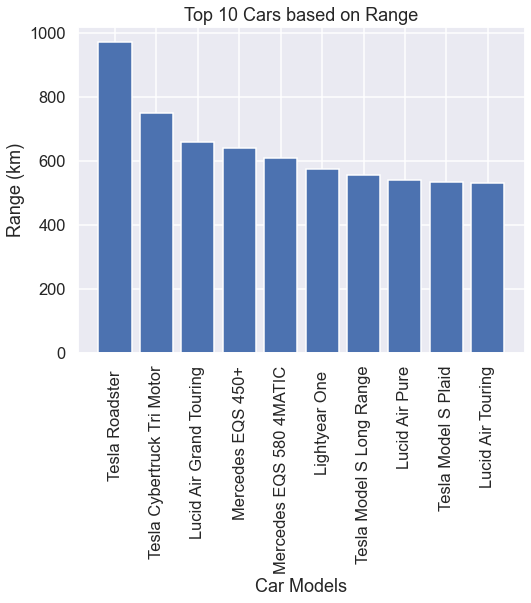

In [18]:
Name = data2c['Name'].head(10)
Range = data2c['Range (km)'].head(10)
fig = plt.figure()
plt.bar(Name, Range)
 
plt.xlabel("Car Models")
plt.xticks(rotation = 90)
plt.ylabel("Range (km)")
plt.title("Top 10 Cars based on Range")
plt.show()

In [19]:
data2d=df[['Name','FastChargeSpeed (km/h)']]
data2d['FastChargeSpeed (km/h)']=df['FastChargeSpeed (km/h)']
data2d=data2d.groupby('Name',as_index=True).max()
data2d=data2d.sort_values('FastChargeSpeed (km/h)',ascending=False)
data2d

,FastChargeSpeed (km/h)
Name,
Lucid Air Pure,1410
Lucid Air Touring,1390
Lucid Air Grand Touring,1380
Kia EV6 Long Range 2WD,980
Porsche Taycan Plus,960
...,...
Renault Kangoo Maxi ZE 33,0
Smart EQ fortwo cabrio,0
Smart EQ forfour,0


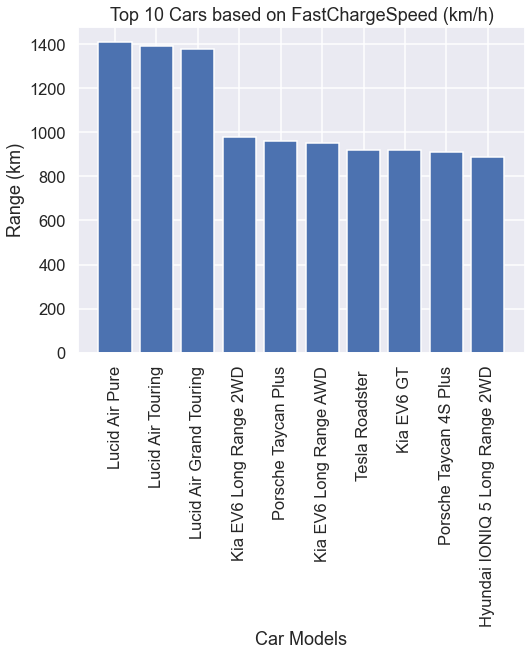

In [20]:
#Name = data2d['Name'].head(10)
Name = data2d.head(10).index.values
FCS = data2d['FastChargeSpeed (km/h)'].head(10)
fig = plt.figure()
plt.bar(Name, FCS)
 
plt.xlabel("Car Models")
plt.xticks(rotation = 90)
plt.ylabel("Range (km)")
plt.title("Top 10 Cars based on FastChargeSpeed (km/h)")
plt.show()

In [21]:
df.head()

,Name,Battery (kWh),Acceleration (sec),TopSpeed (km/h),Range (km),Efficiency (Wh/km),FastChargeSpeed (km/h),Drive,NumberofSeats,PriceinGermany (Euro),PriceinUK (Pounds)
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,"42,990",0
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,"31,680"
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,"29,990","25,995"
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,"79,900"
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,"186,336","138,830"


## Vehicles that use All Wheel Drive

In [22]:
df[df["Drive"] == "All Wheel Drive"]["Name"].values

array(['Audi e-tron Sportback 55 quattro', 'Porsche Taycan Turbo S',
       'Audi e-tron GT RS', 'Lightyear One ', 'Tesla Roadster ',
       'Tesla Model Y Long Range Dual Motor', 'Tesla Model Y Performance',
       'Porsche Taycan 4 Cross Turismo', 'Audi e-tron 50 quattro',
       'Porsche Taycan Turbo', 'Byton M-Byte 95 kWh 4WD',
       'Porsche Taycan 4S', 'Porsche Taycan 4S Plus',
       'Ford Mustang Mach-E SR AWD', 'Ford Mustang Mach-E ER AWD',
       'Ford Mustang Mach-E GT', 'Audi e-tron Sportback 50 quattro',
       'Tesla Cybertruck Dual Motor', 'Tesla Cybertruck Tri Motor',
       'Audi e-tron 55 quattro', 'Audi e-tron S 55 quattro',
       'Audi e-tron S Sportback 55 quattro', 'Skoda Enyaq iV 80X',
       'Skoda Enyaq iV RS', 'Jaguar I-Pace EV400',
       'Nissan Ariya e-4ORCE 63kWh', 'Nissan Ariya e-4ORCE 87kWh',
       'Nissan Ariya e-4ORCE 87kWh Performance',
       'Lucid Air Grand Touring', 'Lucid Air Touring',
       'Tesla Model 3 Long Range Dual Motor', 'Tesla Model

In [23]:
df.isna().sum()

Name                      0
Battery (kWh)             0
Acceleration (sec)        0
TopSpeed (km/h)           0
Range (km)                0
Efficiency (Wh/km)        0
FastChargeSpeed (km/h)    0
Drive                     0
NumberofSeats             0
PriceinGermany (Euro)     0
PriceinUK (Pounds)        0
dtype: int64

## Determining the most expensive EV in the market.

In [24]:
df.head()

,Name,Battery (kWh),Acceleration (sec),TopSpeed (km/h),Range (km),Efficiency (Wh/km),FastChargeSpeed (km/h),Drive,NumberofSeats,PriceinGermany (Euro),PriceinUK (Pounds)
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,"42,990",0
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,"31,680"
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,"29,990","25,995"
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,"79,900"
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,"186,336","138,830"


In [25]:
# Lets remove commas in the price and convert data type to float

df['PriceinGermany (Euro)'] = df['PriceinGermany (Euro)'].str.replace(',','')  # Replace commas with empty string
df['PriceinUK (Pounds)'] = df['PriceinUK (Pounds)'].str.replace(',','')

df['PriceinGermany (Euro)'] = df['PriceinGermany (Euro)'].astype('float')
df['PriceinUK (Pounds)'] = df['PriceinUK (Pounds)'].astype('float')

In [26]:
df.head()

,Name,Battery (kWh),Acceleration (sec),TopSpeed (km/h),Range (km),Efficiency (Wh/km),FastChargeSpeed (km/h),Drive,NumberofSeats,PriceinGermany (Euro),PriceinUK (Pounds)
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990.0,0.0
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0.0,31680.0
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990.0,25995.0
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0.0,79900.0
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336.0,138830.0


### Here we can see prices which is 0 in Pounds but price given in Euro and vice versa. So We can calculate the mean price if both prices are greater than 0 or otherwise we can use as same currency to bring the values to a common value

In [27]:
# Creating new mean price row
price_mean_list = []
for i,j in df.iterrows():
    euro = j['PriceinGermany (Euro)']
    pound = j['PriceinUK (Pounds)']
    
    if (euro > 0 and pound > 0):
        price_mean = (euro + pound)/2
    elif (euro > 0):
        price_mean = euro
    else:
        price_mean = pound
        
    price_mean_list.append(price_mean)
    
df["Price Mean"] = price_mean_list

In [28]:
df.head()

,Name,Battery (kWh),Acceleration (sec),TopSpeed (km/h),Range (km),Efficiency (Wh/km),FastChargeSpeed (km/h),Drive,NumberofSeats,PriceinGermany (Euro),PriceinUK (Pounds),Price Mean
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990.0,0.0,42990.0
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0.0,31680.0,31680.0
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990.0,25995.0,27992.5
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0.0,79900.0,79900.0
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336.0,138830.0,162583.0


In [29]:
most_expensive_record = df[df["Price Mean"] == df["Price Mean"].max()]
#print (most_expensive_record)
most_expensive_ev = most_expensive_record["Name"].values[0]
print ("Most Expensive EV :",most_expensive_ev)

Most Expensive EV : Tesla Roadster 


In [30]:
data2d=df[['Name','Price Mean']]
data2d['Price Mean']=df['Price Mean']
data2d=data2d.groupby('Name',as_index=True).max()
data2d=data2d.sort_values('Price Mean',ascending=False)
data2d

,Price Mean
Name,
Tesla Roadster,202000.0
Porsche Taycan Turbo S Cross Turismo,163828.0
Porsche Taycan Turbo S,162583.0
Lightyear One,149000.0
Porsche Taycan Turbo Cross Turismo,135697.0
...,...
Smart EQ forfour,19457.5
Smart EQ fortwo coupe,18830.0
JAC iEV7s,0.0


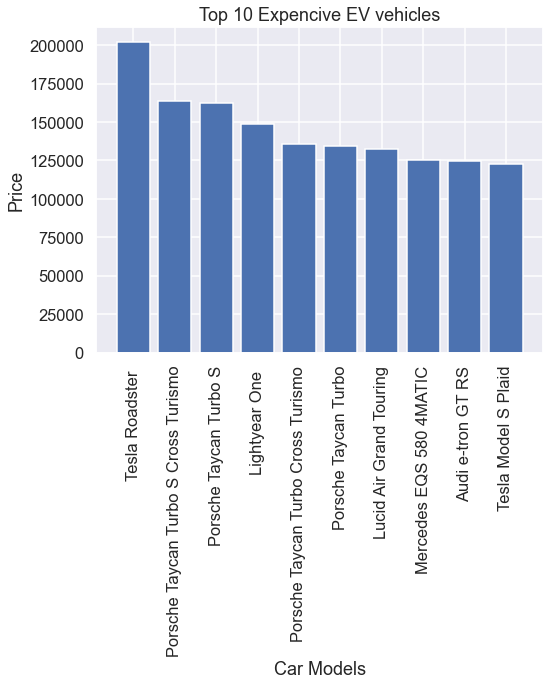

In [31]:
Name = data2d.head(10).index.values
Range = data2d['Price Mean'].head(10)
fig = plt.figure()
plt.bar(Name, Range)
 
plt.xlabel("Car Models")
plt.xticks(rotation = 90)
plt.ylabel("Price")
plt.title("Top 10 Expencive EV vehicles")
plt.show()

### Conclusion 
        Based on the data, we found that the most expensive Electric Vehicle in the market is the Tesla Roadster, based on the mean price since the data that was provided contained Euro and British Pounds. We also determined the fastest charging EVs as well as the fastest EV based on Top Speed. Which where the Lucid Air Pure and the Tesla Roadster.
        
        The tests we attempted led us to reaching the goals we had set out to find. Also the visual aspects of the data helped us determine the outcome.
